<img style="float: left;" src="pic2.png">

### Sridhar Palle, Ph.D, spalle@emory.edu (Applied ML & DS with Python Program)

# Project: Time Series Forecasting - Drugs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose


%matplotlib inline

## E.1. Data Collection

**Load the Drug dataset**

In [2]:
data = pd.read_csv('drug.csv', parse_dates = True, index_col = 'date')
data.columns = ['Sales']
drug = pd.Series(data['Sales'])
drug.head()

date
1991-07-01    3.526591
1991-08-01    3.180891
1991-09-01    3.252221
1991-10-01    3.611003
1991-11-01    3.565869
Name: Sales, dtype: float64

**Q. Check to see if there are any missing values**

In [3]:
#Your code

In [4]:
drug.isnull().sum() # Looks like there are no missing values

0

## 2. Preliminary Exploration

**Q. See the index**

In [5]:
#Your code

In [6]:
drug.index # Its a datetime index

DatetimeIndex(['1991-07-01', '1991-08-01', '1991-09-01', '1991-10-01',
               '1991-11-01', '1991-12-01', '1992-01-01', '1992-02-01',
               '1992-03-01', '1992-04-01',
               ...
               '2007-09-01', '2007-10-01', '2007-11-01', '2007-12-01',
               '2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01'],
              dtype='datetime64[ns]', name='date', length=204, freq=None)

**Q. Plot the series**

In [7]:
# Your code

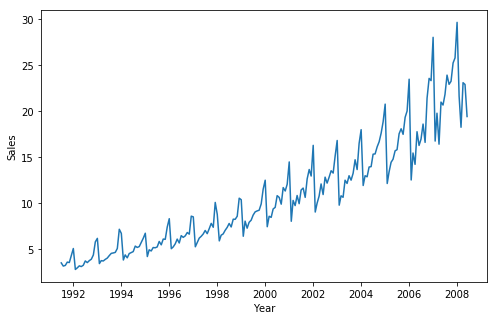

In [8]:
fig = plt.figure(figsize = (8,5))
plt.plot(drug.index, drug)
plt.xlabel('Year')

plt.ylabel('Sales')

plt.show()

**Q. Total Number of sales for each year**

In [9]:
#Your code

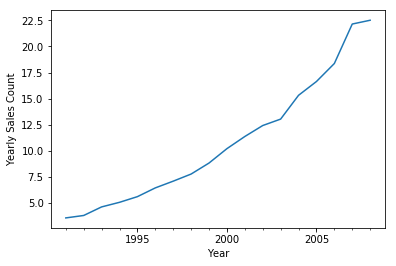

In [10]:
drug.resample('Y').mean().plot()

plt.xlabel('Year')

plt.ylabel('Yearly Sales Count')

plt.show()

**Q. Get overall mean monthly sales**

In [11]:
# Your code

In [12]:
drug.groupby(drug.index.month).mean()

date
1     14.171518
2      8.612831
3      9.489650
4      9.553137
5     10.563693
6     10.222276
7      9.986016
8     10.264747
9     10.234068
10    11.017340
11    11.486242
12    12.731636
Name: Sales, dtype: float64

## 3. Stationarity Checks and Data Preprocessing

### 3.1 Dickey Fuller Test 

**Q. Perform the fuller test and determine if the series is Stationary**

In [13]:
from statsmodels.tsa.stattools import adfuller
#Your code

In [14]:
adf_test = adfuller(drug)

adf_test_out = pd.Series(adf_test[0:4], index=['Test Statistic','p-value','#Lags Used', 'Number of Observations Used'])
adf_test_out

Test Statistic                   3.145186
p-value                          1.000000
#Lags Used                      15.000000
Number of Observations Used    188.000000
dtype: float64

**Q. See if taking a log and then differencing one time helps to stationarize the series**

**Take a log, firt order difference and  then do fuller test. Check the p-value**

In [15]:
#Your code

In [16]:
drug = np.log(drug)

adf_test = adfuller(drug.diff().dropna())

adf_test_out = pd.Series(adf_test[0:4], index=['Test Statistic','p-value','#Lags Used', 'Number of Observations Used'])
adf_test_out

Test Statistic                  -4.519432
p-value                          0.000181
#Lags Used                      13.000000
Number of Observations Used    189.000000
dtype: float64

## 4. ARIMA Models

**Q. Fit ARIMA model with p,q,d=1**

**ARIMA**

In [17]:
from statsmodels.tsa.arima_model import ARIMA

#Your code

In [18]:
arimamodel = ARIMA(drug, order = (1,1,1)) 
ARIMA_model = arimamodel.fit()

print ('AIC for ARIMA model:', ARIMA_model.aic)
#These errors are calculated between actual differenced values, and model fitted differenced values

C:\Users\palle\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\palle\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


AIC for ARIMA model: -190.28168863961366


**Q. Plotting the original in-sample and predicted values**

In [19]:
#Your code

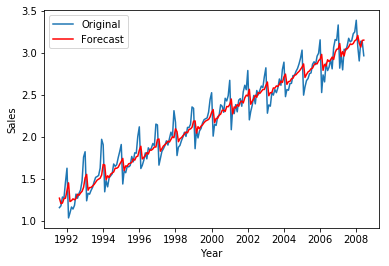

In [20]:
plt.plot(drug[1:], label = 'Original')
plt.plot(ARIMA_model.predict(typ='levels'), label = 'Forecast', color='r')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.show()

**Q. Perform train/test split (90/10) and print, X_train, X_test shapes**

**Train/Test split**

In [21]:
#Your code

In [22]:
n_train = int(drug.shape[0]*0.9) # 90% of data goes into training set
n_test = drug.shape[0]-n_train

X_train = drug[:n_train]
print (X_train.shape)

X_test = drug[n_train:]
print (X_test.shape)

(183,)
(21,)


**Q. Perform ARIMA on training data, print AIC and forecast on test data**

**ARIMA on Training Data**

In [23]:
#Your code

In [24]:
modeltrain = ARIMA(X_train, order=(1,1,1))
ARIMA_train = modeltrain.fit()

print ('AIC on Training Data:', ARIMA_train.aic)

C:\Users\palle\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\palle\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


AIC on Training Data: -170.40030630222816


**Q. Forecast on the Test Data**

In [25]:
#Your code

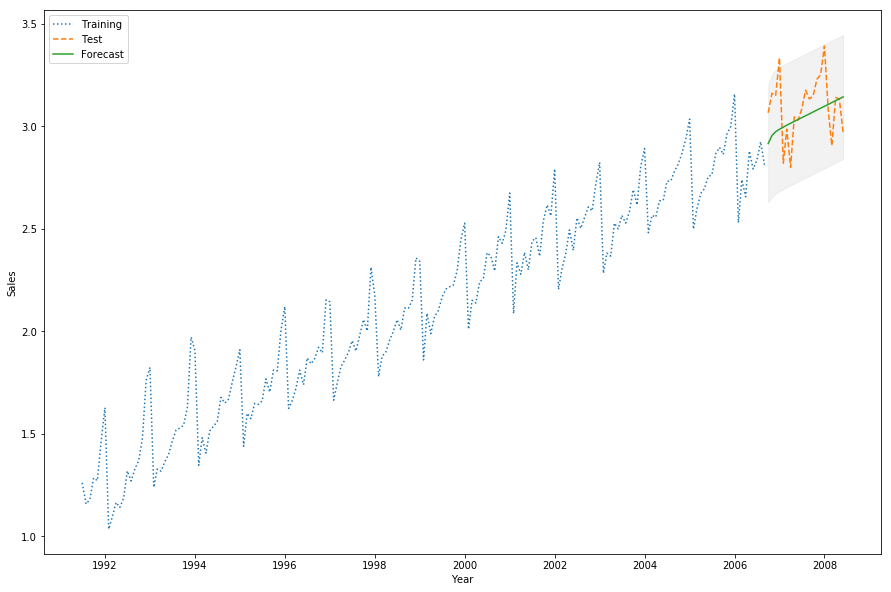

In [26]:
fc, se, conf = ARIMA_train.forecast(steps = X_test.shape[0], alpha = 0.05)


drug_fc = pd.Series(fc, index = X_test.index)

lowerb_conf = pd.Series(conf[:,0], index = X_test.index)
upperb_conf = pd.Series(conf[:,1], index = X_test.index)
plt.figure(figsize = (15,10))

plt.plot(X_train, label = 'Training', linestyle = ':')
plt.plot(X_test, label = 'Test', linestyle = '--')
plt.plot(drug_fc, label = 'Forecast', linestyle = '-')
plt.xlabel('Year')
plt.ylabel('Sales')

plt.fill_between(lowerb_conf.index, lowerb_conf, upperb_conf, color='k', alpha = 0.05)
plt.legend()
plt.show()

### Forecasting into future

**Q. Forecast extra 12 months**

In [27]:
#Your code

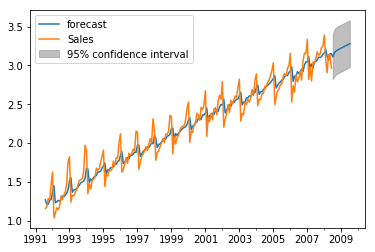

In [28]:
ARIMA_model.plot_predict(1,216) # For an extra 12 months
plt.show()